<a href="https://colab.research.google.com/github/Hariprakashhp/singapore-flat-price-prediction/blob/main/singapore_flat_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
df1 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate19901999 (1).csv")
df2 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5 = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")

In [231]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [232]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
928304,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988.0,800000.0,63 years 03 months
928305,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988.0,850000.0,63 years 01 month
928306,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986.0,790000.0,61 years
928307,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988.0,1000000.0,62 years 08 months


In [233]:
df.shape

(928309, 11)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928309 entries, 0 to 928308
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928309 non-null  object 
 1   town                 928308 non-null  object 
 2   flat_type            928308 non-null  object 
 3   block                928308 non-null  object 
 4   street_name          928308 non-null  object 
 5   storey_range         928308 non-null  object 
 6   floor_area_sqm       928308 non-null  float64
 7   flat_model           928308 non-null  object 
 8   lease_commence_date  928308 non-null  float64
 9   resale_price         928308 non-null  float64
 10  remaining_lease      219386 non-null  object 
dtypes: float64(3), object(8)
memory usage: 77.9+ MB


In [235]:
df.isnull().sum()

month                       0
town                        1
flat_type                   1
block                       1
street_name                 1
storey_range                1
floor_area_sqm              1
flat_model                  1
lease_commence_date         1
resale_price                1
remaining_lease        708923
dtype: int64

In [236]:

df_cleaned = df.dropna()


for col in ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']:
    df[col].fillna(df[col].mode()[0], inplace=True)


df.drop(columns=['remaining_lease'], inplace=True)




In [237]:
df.duplicated().sum()

1971

In [238]:
df.drop_duplicates(inplace = True)

In [239]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0


In [240]:
df.town.unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [241]:
df.flat_model.unique(),len(df.flat_model.unique())


(array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
        'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
        'Maisonette', 'Multi Generation', 'Adjoined flat',
        'Premium Apartment', 'Terrace', 'Improved-Maisonette',
        'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
        'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object),
 34)

In [242]:


df.month.unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [243]:
df['flat_model'] = df['flat_model'].str.upper()
df.flat_model.unique(),


(array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
        'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT',
        '3GEN'], dtype=object),)

In [244]:
df.flat_type.unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [245]:
df['flat_type'] = df['flat_type'].replace({'MULTI-GENERATION': 'MULTI GENERATION'})


In [246]:
df.floor_area_sqm.min(), df.floor_area_sqm.max()



(28.0, 307.0)

In [247]:
sorted(df.storey_range.unique())


['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [248]:
df.block.unique()


array(['309', '216', '211', ..., '240A', '460D', '83A'], dtype=object)

In [249]:
df['storey_range'] = df['storey_range'].str.replace(' TO ', '-')


In [250]:
sorted(df.lease_commence_date.unique())


[1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0]

In [251]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')


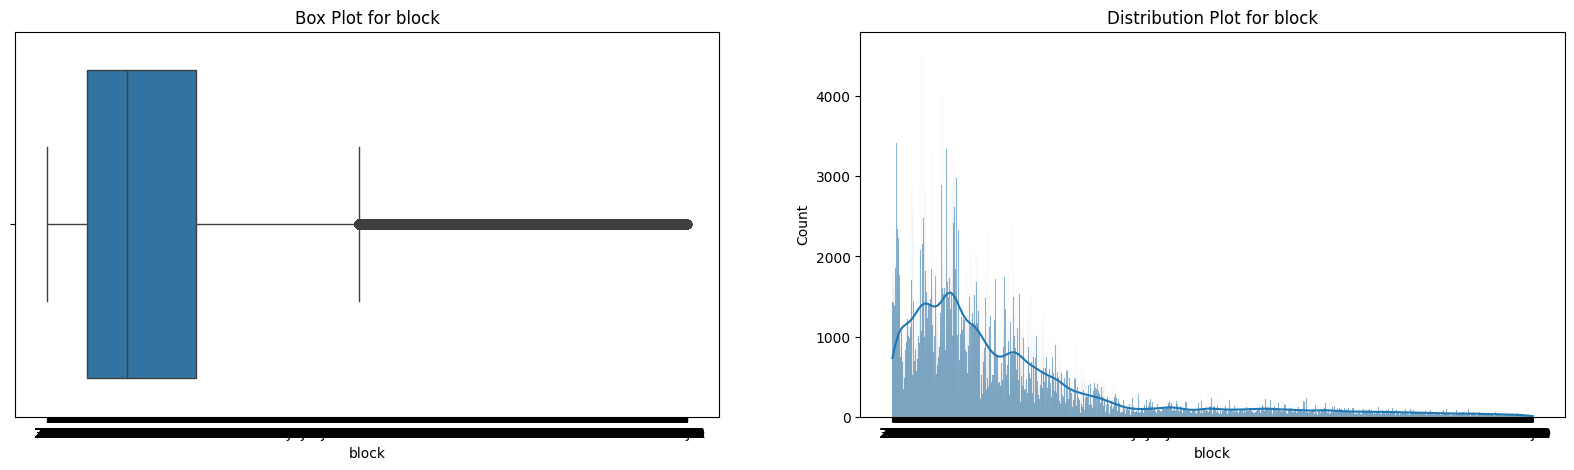

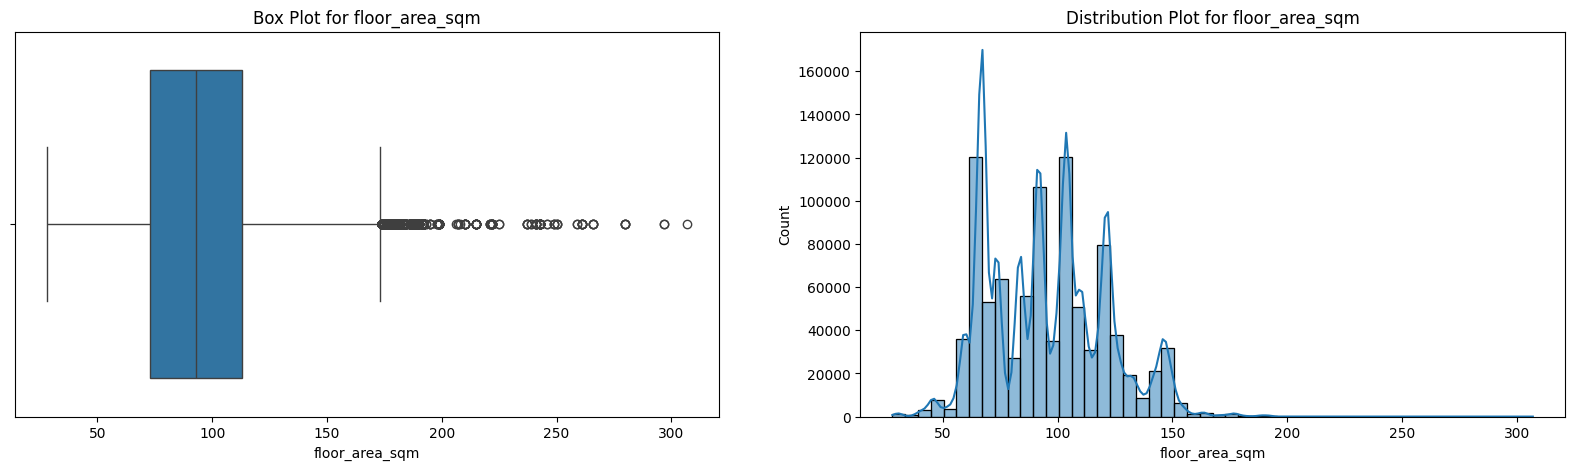

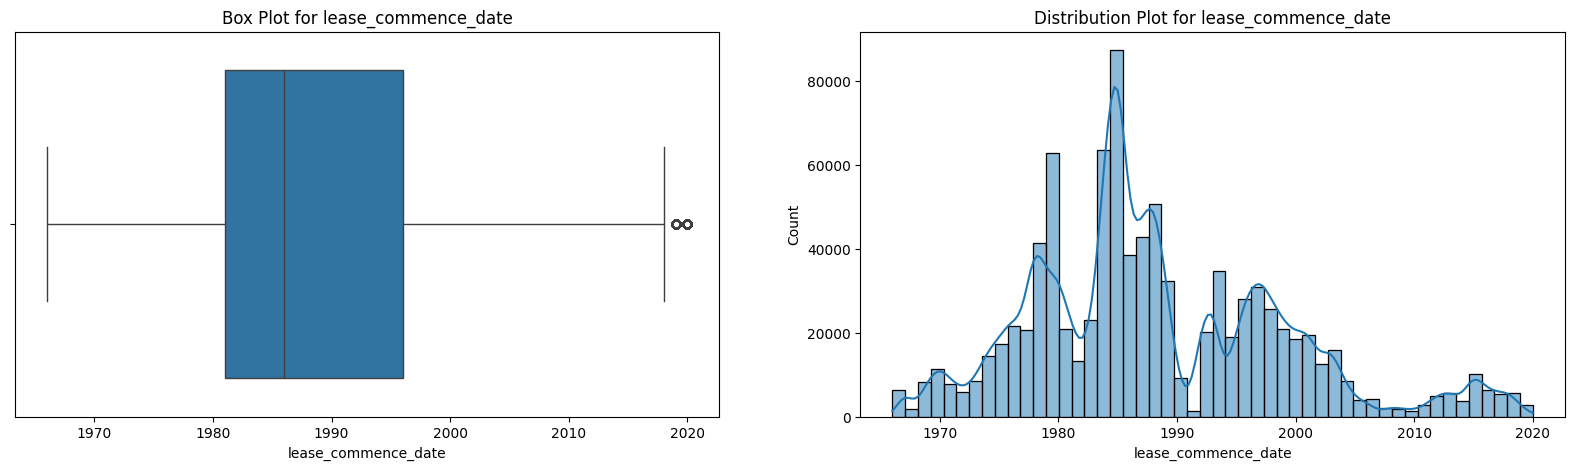

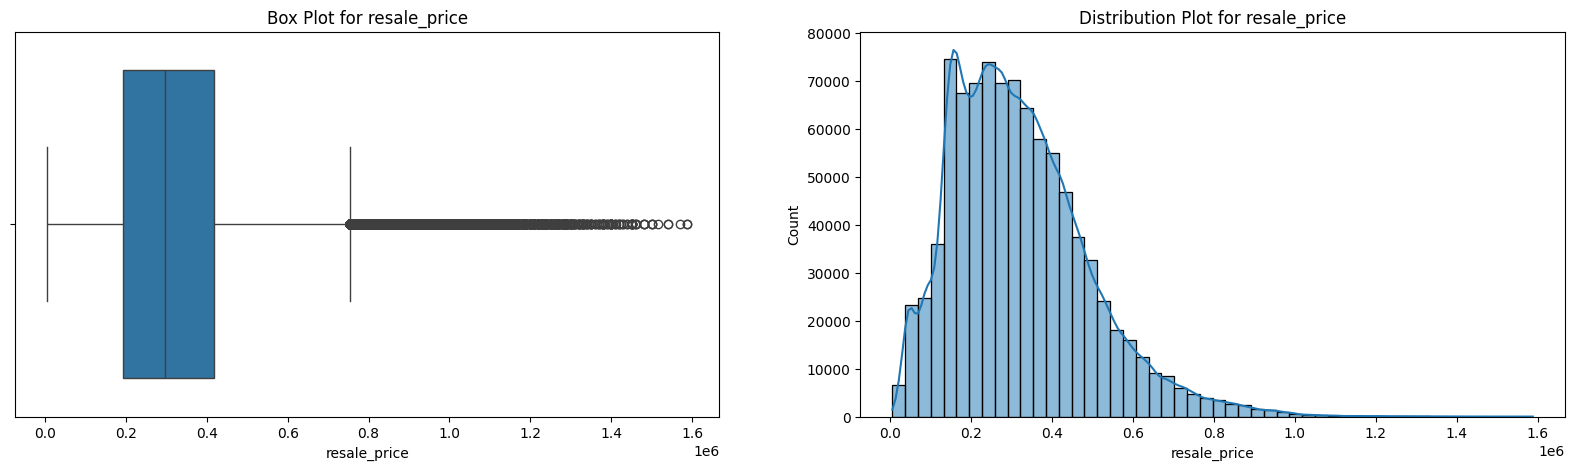

In [252]:
for i in ['block', 'floor_area_sqm', 'lease_commence_date', 'resale_price']:
    plot(df, i)


In [253]:
df.floor_area_sqm.describe()


count    926338.000000
mean         95.713379
std          25.820876
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         307.000000
Name: floor_area_sqm, dtype: float64

In [254]:
df[df['floor_area_sqm'] >300]


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
167243,1997-08,KALLANG/WHAMPOA,3 ROOM,52,JLN BAHAGIA,01-03,307.0,TERRACE,1972.0,663388.0


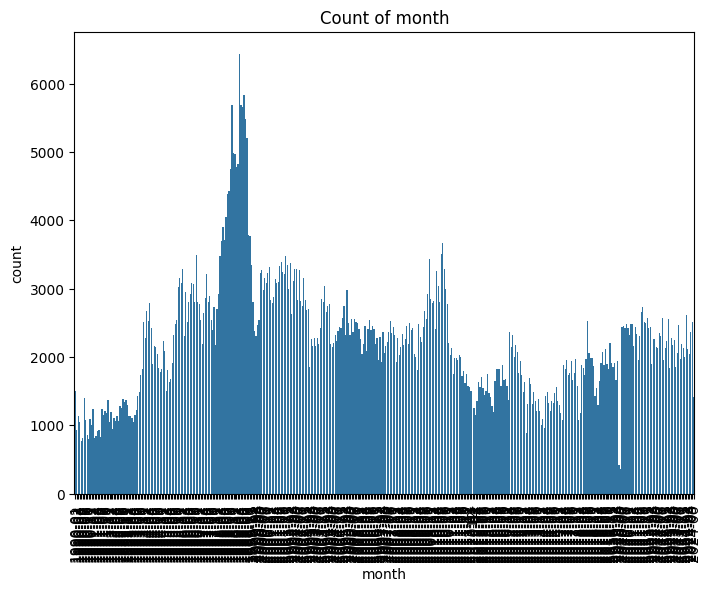

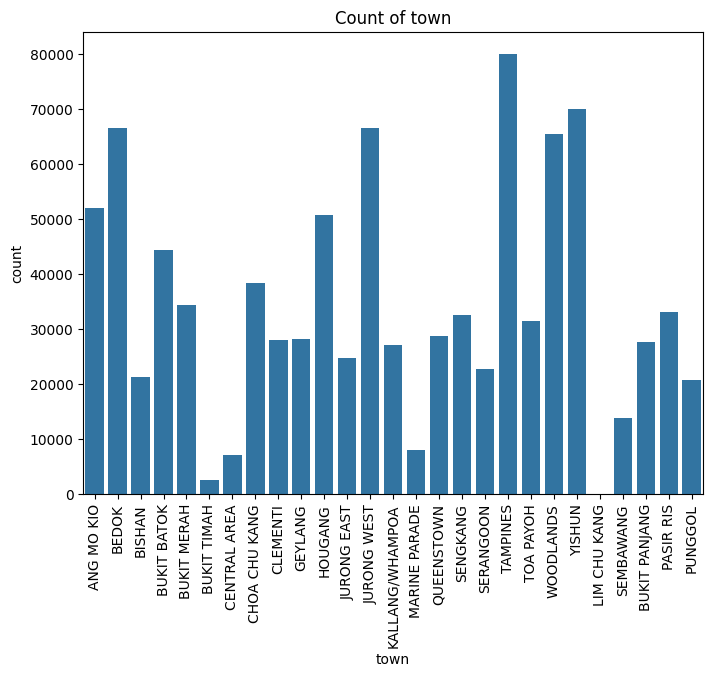

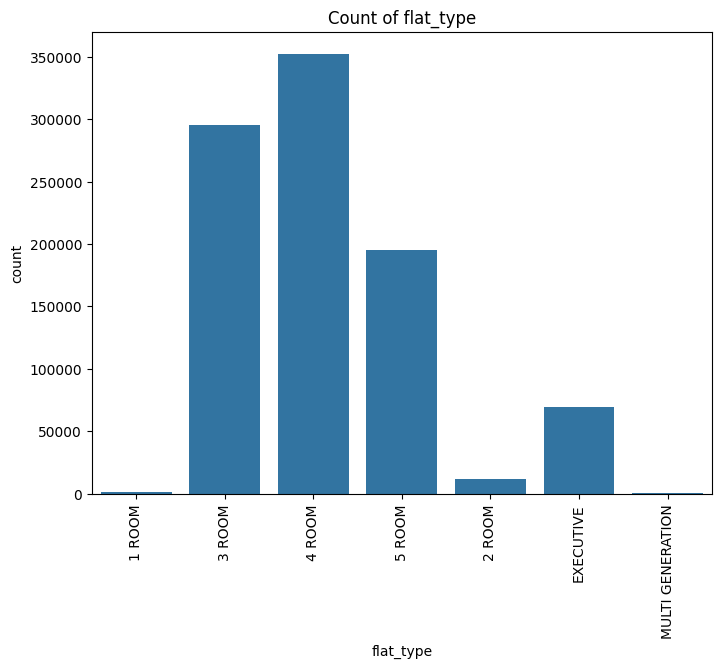

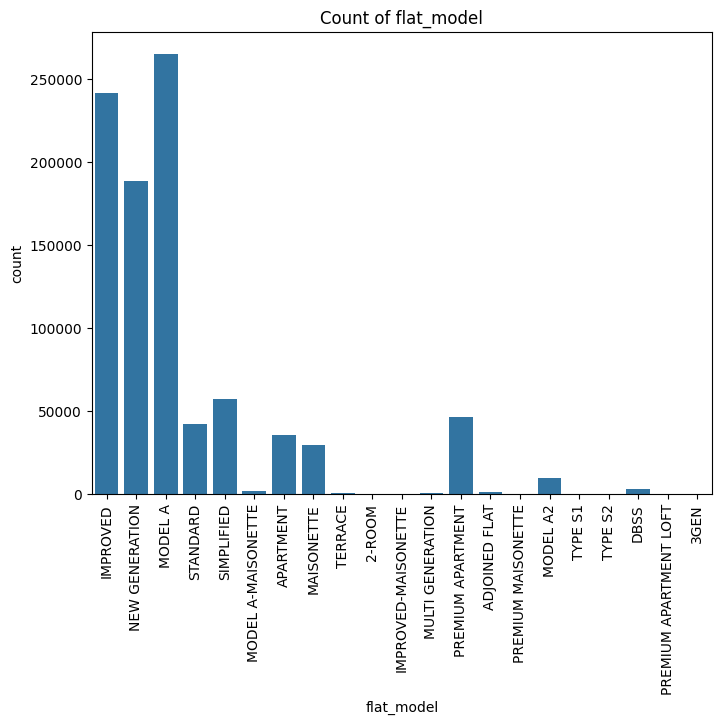

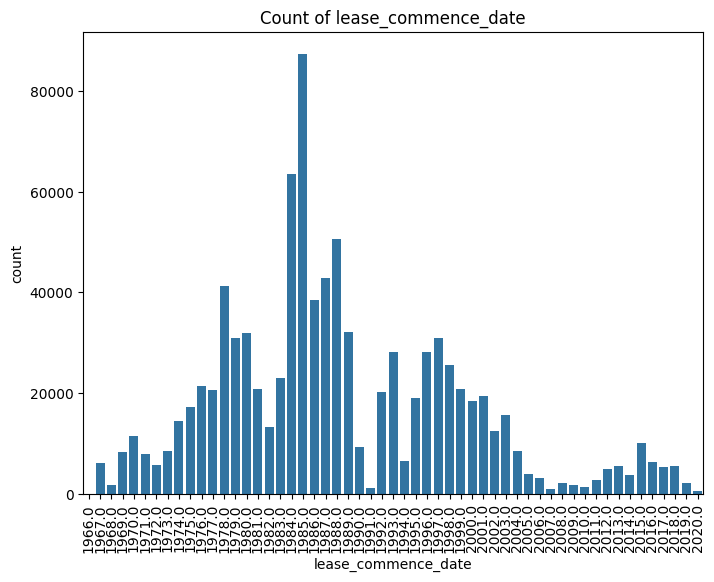

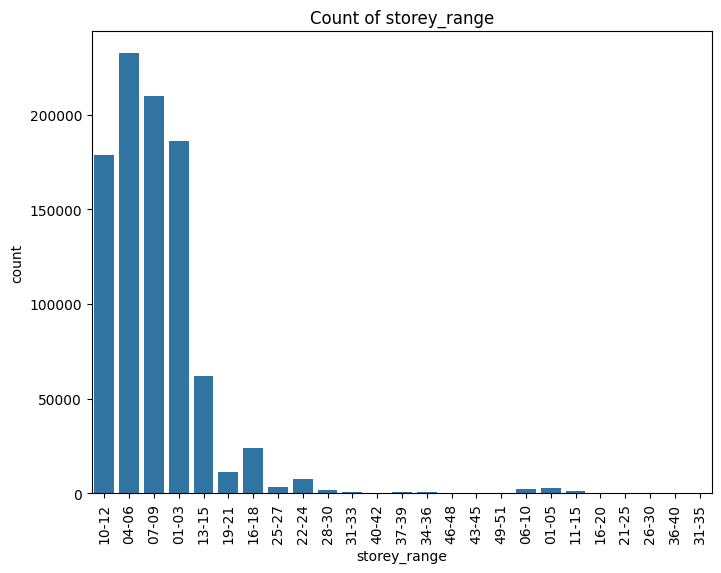

In [255]:
cat_vars = ['month','town',	'flat_type',	'flat_model',	'lease_commence_date','storey_range']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=90)
    plt.show()


          flat_type  flat_model
0            1 ROOM           1
1            2 ROOM           6
2            3 ROOM           9
3            4 ROOM          12
4            5 ROOM          11
5         EXECUTIVE           5
6  MULTI GENERATION           1


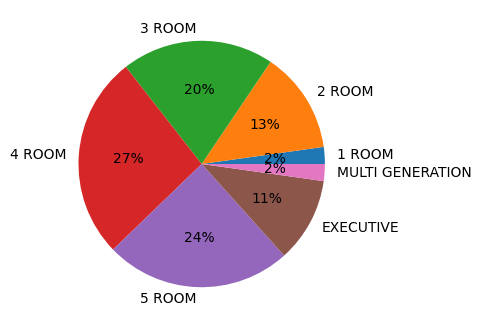

In [256]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()


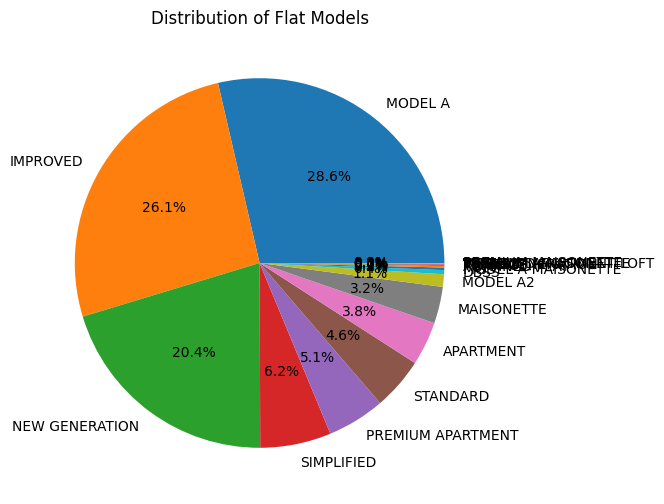

In [257]:
plt.figure(figsize=(10, 6))
df['flat_model'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Flat Models')
plt.ylabel('')
plt.show()


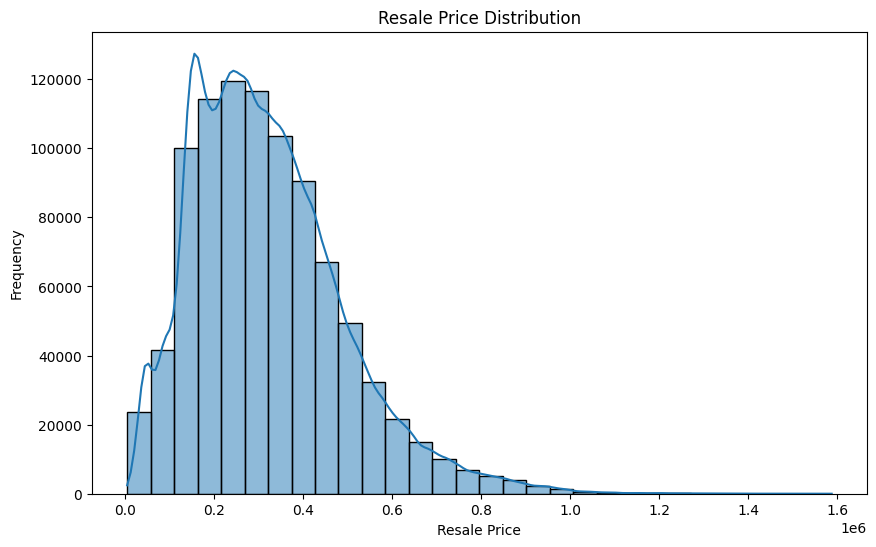

In [258]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=30, kde=True)
plt.title('Resale Price Distribution')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()


In [259]:
print("Missing values in 'town' column:", df['town'].isnull().sum())
print("Missing values in 'resale_price' column:", df['resale_price'].isnull().sum())


Missing values in 'town' column: 0
Missing values in 'resale_price' column: 0


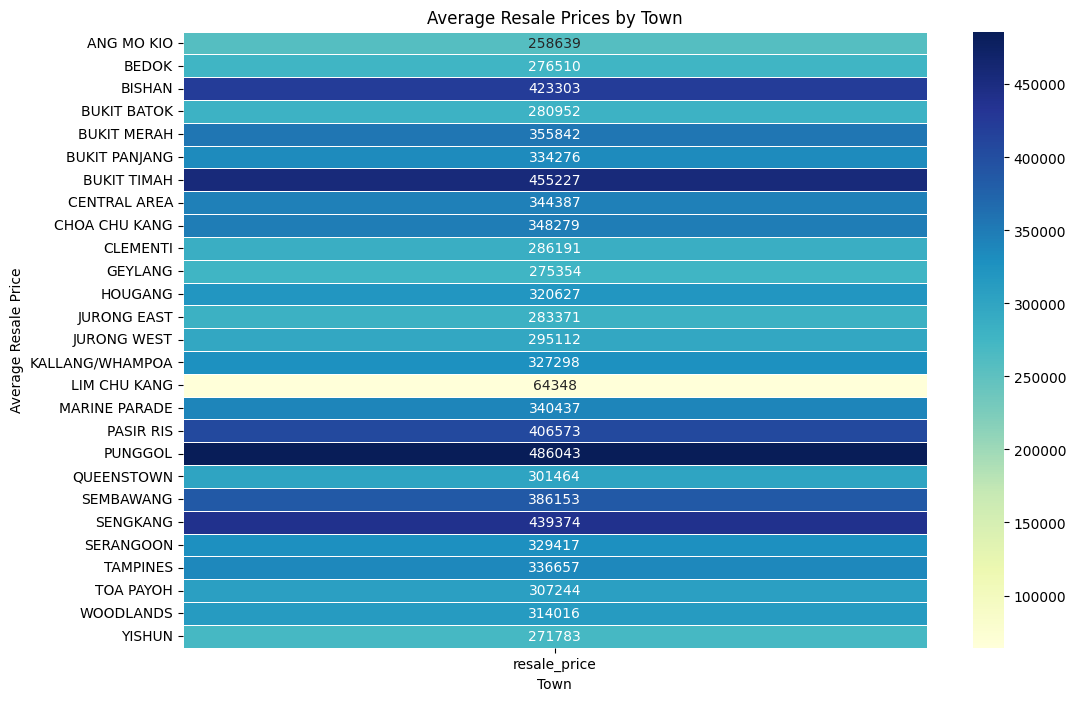

In [260]:
heatmap_data = df.groupby('town')['resale_price'].mean().reset_index()
heatmap_data = heatmap_data.pivot_table(index='town', columns=None, values='resale_price')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.show()

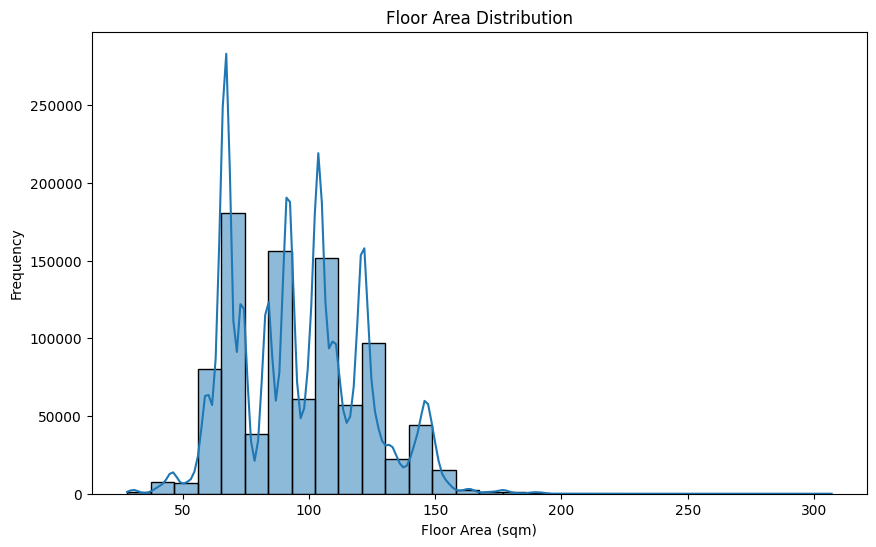

In [261]:
plt.figure(figsize=(10, 6))
sns.histplot(df['floor_area_sqm'], bins=30, kde=True)
plt.title('Floor Area Distribution')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()


In [266]:
import pickle


In [267]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder for the target labels
le = LabelEncoder()
# Encode the categorical labels
town_encoder = le.fit(df['town'].unique())
df['town']=town_encoder.transform(df['town'])

pickle_=open("town_encoder.pkl","wb")
pickle.dump(town_encoder,pickle_)
pickle_.close()


In [268]:
with open("/content/town_encoder.pkl", "rb") as pickle_file:
    town_encoder = pickle.load(pickle_file)

# Assuming you have new data in a DataFrame called 'new_data'
# Transform the 'town' column of the new data using the loaded encoder
print(town_encoder.transform(['WOODLANDS']))


[25]


In [269]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder for the target labels
le = LabelEncoder()
# Encode the categorical labels
town_encoder = le.fit(df['block'].unique())
df['block']=town_encoder.transform(df['block'])

pickle_=open("block_encoder.pkl","wb")
pickle.dump(town_encoder,pickle_)
pickle_.close()


In [270]:
import pickle
from sklearn.preprocessing import LabelEncoder


encode_cols = ['flat_type', 'street_name', 'storey_range', 'flat_model']


le_dict = {}

for col in encode_cols:

    le = LabelEncoder()

    encoded_values = le.fit_transform(df[col])

    df[col] = encoded_values

    le_dict[col] = le


for col, le in le_dict.items():
    with open(col + '1_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)


In [271]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=42)


In [272]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics
